<a href="https://colab.research.google.com/github/kevinrioharris/Hotel-Booking-Demand/blob/main/Final_Project_Gamma_Team_Hotel_Booking_Demand_2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hotel Booking Demand


1. [Problem Statement](#Problem-Statement)
1. [Data Understanding](#Data-Understanding)
1. [Exploratory Data Analysis](#Exploratory-Data-Analysis)
1. [Preprocessing](#Preprocessing)
1. [Modeling](#Modeling)
1. [Conclusion & Recommendation](#Conclusion-&-Recommendation)

## Context

In the hospitality industry, web reservations are the trend, offering convenience to travelers and expanded reach to hotels. All the same, with this shift has come a significant wave of booking cancellations that is proving difficult to hotel operations and revenue management. Studies have reported 19% of cancellations coming from a hotel's website, 39% from Booking.com, and 25% from Expedia in the course of a four-month period. (sources)

Several factors contribute to this large number of cancellations:

- Guests prefer booking multiple hotels simultaneously, planning to finalize a decision closer to the date of arrival. This practice makes it more likely to have cancellations as travelers limit their options.(sources)

- Free cancellation as an option encourages guests to reserve rooms with no strings attached, making cancellations more likely.

- Unforeseen situations such as bad weather, strikes, computer failures, or personal emergencies might disrupt travel schedules, leading to last-minute cancellations.

## Problem Statement

### Problem Background & Stakeholders
The hotel industry faces significant challenges related to booking cancellations, which can impact revenue, operational efficiency, and overall customer satisfaction. Key stakeholders include:

- **Hotel Management:** Seeks to minimize revenue loss due to last-minute cancellations.
- **Revenue Management Teams:** Need accurate cancellation predictions to implement dynamic pricing and optimize room allocation.
- **Marketing Departments:** Can target customers more effectively by understanding cancellation patterns.
- **Business Strategy Teams:** Focus on evaluating campaign effectiveness, measuring ROI, and developing actionable strategies for growth.

## Analytical Approach

### Evaluating Model Performance: Understanding False Positives and False Negatives

When predicting hotel booking cancellations, it is crucial to understand the implications of false positives and false negatives, as they directly impact revenue management and operational planning.

#### False Positives (FP)
- **Definition:**  
  The model predicts that a booking will be canceled, but in reality, it is not canceled.
- **Business Impact:**  
  - Wasted retention efforts (discounts or promotions given unnecessarily)

#### False Negatives (FN)
- **Definition:**  
  The model predicts that a booking will not be canceled, but in reality, it is canceled.
- **Business Impact:**  
  - **Lost Revenue:** When a cancellation is not predicted, the hotel may prepare for the guest's arrival (e.g., staffing, inventory, and service preparations) and incur associated costs, only to have the room remain vacant.
  - **Missed Rebooking Opportunities:** A false negative can prevent the hotel from proactively rebooking the room, leading to significant revenue loss.
  
### Deciding Which is More Critical: FP or FN?
- **False Negatives are more critical.**  
  In the context of hotel booking cancellation prediction, failing to identify a cancellation (FN) can lead to unoccupied rooms and lost revenue opportunities.

### Choosing Evaluation Metrics for Booking Cancellation Prediction
  
- **F2 Score:**  
  Finding balance between recall and precision, with emphasize on recall, using the F2 Score is essential. This metric helps in managing the trade-off between catching as many cancellations as possible (recall) while avoiding too many false alarms (precision) that can lead to unnecessary overbooking strategies.

- **Recall:**  
  Recall is the most critical metric in this scenario. A high recall ensures that the model captures as many actual cancellations as possible, minimizing the risk of unanticipated vacant rooms.

### Conclusion
- **Prioritize recall** to ensure that as many at-risk bookings as possible are flagged, reducing the chance of unanticipated cancellations.
- **Balance recall and precision** using the F2 Score to avoid excessive operational adjustments and overbooking risks.
- **Utilize ROC AUC** as a supplementary metric to gauge overall model performance during model selection.

By focusing on these metrics, we can ensure that our cancellation prediction model not only identifies potential cancellations accurately but also supports informed operational and revenue management decisions.

---

## Data Understanding

In this section, we will explore the dataset in detail to understand its structure, features, and any potential issues that may affect our classification model for predicting booking cancellations.

### Dataset Overview
- **Source:** [Hotel Booking Demand Dataset on Kaggle](https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand/data)
- **Description:**  
  This dataset contains 119,389 historical booking records from hotels, which include various features such as booking details, customer demographics, and booking statuses. Each row in the dataset represents a single booking record.

- **Target Variable:**  
  For our classification task, the target variable is **`is_canceled`**, where:
  - `1` indicates that the booking was canceled.
  - `0` indicates that the booking was not canceled.

### Feature Overview

Below is a table summarizing the key features in the dataset:

| **Feature**                         | **Description**                                                                                               |
|-------------------------------------|-----------------------------------------------------------------------------------------------------------|
| **adr**                             | Average Daily Rate per room (in hotel currency).                                                          |
| **adults**                          | Number of adults in the booking.                                                                          |
| **agent**                           | Travel agent ID handling the booking (can be null).                                                       |
| **arrival_date_day_of_month**       | Day of the month when the arrival is scheduled.                                                           |
| **arrival_date_month**              | Month of arrival (e.g., "January", "February").                                                           |
| **arrival_date_week_number**        | Week number of the arrival date.                                                                          |
| **arrival_date_year**               | Year of arrival.                                                                                          |
| **assigned_room_type**              | Code of the room type actually assigned.                                                                 |
| **babies**                          | Number of babies in the booking.                                                                          |
| **booking_changes**                 | Number of changes made to the booking.                                                                    |
| **children**                        | Number of children in the booking (can be null).                                                          |
| **company**                         | Company ID associated with the booking (can be null).                                                     |
| **country**                         | Country of origin of the customer (can be null).                                                          |
| **customer_type**                   | Type of customer ("Transient", "Contract", "Group", "Transient-Party").                                  |
| **days_in_waiting_list**            | Number of days the booking was on the waiting list before confirmation.                                   |
| **deposit_type**                    | Type of deposit required ("No Deposit", "Non Refundable", "Refundable").                                  |
| **distribution_channel**            | Booking distribution channel (e.g., "TA/TO", "Direct").                                                  |
| **hotel**                           | Type of hotel ("Resort Hotel" or "City Hotel").                                                            |
| **is_canceled**                     | Booking cancellation status (1 = canceled, 0 = not canceled).                                             |
| **is_repeated_guest**               | Indicates if the guest has stayed at the hotel before (1 = Yes, 0 = No).                                  |
| **lead_time**                       | Number of days between booking and arrival.                                                               |
| **market_segment**                  | Market segment category (e.g., "Direct", "Corporate", "Online TA").                                       |
| **meal**                            | Type of meal plan booked (e.g., "BB" for Bed & Breakfast).                                                |
| **previous_bookings_not_canceled**  | Number of previous bookings that were not canceled.                                                       |
| **previous_cancellations**          | Number of previous bookings that were canceled.                                                           |
| **required_car_parking_spaces**     | Number of car parking spaces requested by the customer.                                                  |
| **reserved_room_type**              | Code of the room type initially reserved.                                                                 |
| **reservation_status**              | Final reservation status ("Canceled", "Check-Out", "No-Show").                                            |
| **reservation_status_date**         | Date when the reservation status was last updated.                                                       |
| **stays_in_week_nights**            | Number of weekday nights (Monday-Friday) included in the booking.                                         |
| **stays_in_weekend_nights**         | Number of weekend nights (Saturday/Sunday) included in the booking.                                       |
| **total_of_special_requests**       | Total number of special requests made (e.g., extra bed, high floor).                                      |
                                        |


---

### Importing Libraries and Loading Data

In [68]:
!pip install category_encoders

In [69]:
#Import Libraries

import gdown
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# train test split
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

from sklearn.model_selection import cross_validate

# encoding
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder

# scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# column transformer & pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# cross validation
from sklearn.model_selection import cross_val_score

# algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, make_scorer, fbeta_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import roc_auc_score, roc_curve, classification_report
from sklearn.metrics import make_scorer, recall_score, f1_score, roc_curve, auc, precision_recall_curve,fbeta_score
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline
from category_encoders import BinaryEncoder
from lightgbm import LGBMClassifier
# hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


import shap

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")


In [70]:
pd.set_option('display.max_columns',None)

In [71]:
#  Google Drive file ID for the Hotel Booking Demand dataset
file_id = "1tpmHknHJK-dS7oYhQZiytrqrSDj0ne9D"
file_url = f"https://drive.google.com/uc?id={file_id}"
output_file = "Hotel_Booking_Demand.csv"

# Download the file using gdown
gdown.download(file_url, output_file, quiet=False)

print("\nDownload complete! File saved as:", output_file)


Downloading...
From: https://drive.google.com/uc?id=1tpmHknHJK-dS7oYhQZiytrqrSDj0ne9D
To: /content/Hotel_Booking_Demand.csv
100%|██████████| 16.9M/16.9M [00:00<00:00, 29.9MB/s]



Download complete! File saved as: Hotel_Booking_Demand.csv


In [72]:
# Extract File into Dataframe
df = pd.read_csv(r'/content/Hotel_Booking_Demand.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [73]:
df.shape

(119390, 32)

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [75]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


In [76]:
df.describe(include='object').transpose()

,count,unique,top,freq
hotel,119390,2,City Hotel,79330
arrival_date_month,119390,12,August,13877
meal,119390,5,BB,92310
country,118902,177,PRT,48590
market_segment,119390,8,Online TA,56477
distribution_channel,119390,5,TA/TO,97870
reserved_room_type,119390,10,A,85994
assigned_room_type,119390,12,A,74053
deposit_type,119390,3,No Deposit,104641
customer_type,119390,4,Transient,89613


In [77]:
pd.DataFrame({
    'column': df.columns.values,
    'datatype': df.dtypes.values,
    'nullvalue(%)': df.isna().mean().values * 100,
    'negativevalue(%)': [len(df[col][df[col] < 0]) / len(df) * 100 if col in df.select_dtypes(include=[np.number]).columns else 0 for col in df.columns],
    '0value(%)': [len(df[col][df[col] == 0]) / len(df) * 100 if col in df.select_dtypes(include=[np.number]).columns else 0 for col in df.columns],
    'duplicate' : df.duplicated().sum(),
    'uniquevalue': df.nunique().values,
    'sample_unique': [df[col].unique() for col in df.columns]}
).round(3)

,column,datatype,nullvalue(%),negativevalue(%),0value(%),duplicate,uniquevalue,sample_unique
0,hotel,object,0.000,0.000,0.000,31994,2,"[Resort Hotel, City Hotel]"
1,is_canceled,int64,0.000,0.000,62.958,31994,2,"[0, 1]"
2,lead_time,int64,0.000,0.000,5.315,31994,479,"[342, 737, 7, 13, 14, 0, 9, 85, 75, 23, 35, 68..."
3,arrival_date_year,int64,0.000,0.000,0.000,31994,3,"[2015, 2016, 2017]"
4,arrival_date_month,object,0.000,0.000,0.000,31994,12,"[July, August, September, October, November, D..."
5,arrival_date_week_number,int64,0.000,0.000,0.000,31994,53,"[27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 3..."
6,arrival_date_day_of_month,int64,0.000,0.000,0.000,31994,31,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
7,stays_in_weekend_nights,int64,0.000,0.000,43.553,31994,17,"[0, 1, 2, 4, 3, 6, 13, 8, 5, 7, 12, 9, 16, 18,..."
8,stays_in_week_nights,int64,0.000,0.000,6.403,31994,35,"[0, 1, 2, 3, 4, 5, 10, 11, 8, 6, 7, 15, 9, 12,..."
9,adults,int64,0.000,0.000,0.338,31994,14,"[2, 1, 3, 4, 40, 26, 50, 27, 55, 0, 20, 6, 5, 10]"


The dataset contains information related to hotel bookings, including details about the booking, customer, and stay. It consists of 31 columns and 31,994 rows. Each row represents a unique booking, and the columns capture various attributes such as booking details, customer information, and stay characteristics.

1.  62.96% of bookings are not canceled, but a significant portion (37.04%) are canceled.

2.  Most bookings are for adults, with very few including children or babies.

3. Most bookings are made through online travel agents or directly.

4. The adr column can be used to analyze revenue trends and pricing strategies.

5. Some columns like company and agent have high null values, which may require imputation or removal.

## Data Cleaning

### Duplicated Data

In [78]:
display(f'Total of Duplicated Rows: {df.duplicated().sum()}')
display(df[df.duplicated])

'Total of Duplicated Rows: 31994'

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,A,A,1,No Deposit,250.0,NaN,0,Transient,84.67,0,1,Check-Out,2015-07-07
43,Resort Hotel,0,70,2015,July,27,2,2,3,2,0.0,0,HB,ROU,Direct,Direct,0,0,0,E,E,0,No Deposit,250.0,NaN,0,Transient,137.00,0,1,Check-Out,2015-07-07
138,Resort Hotel,1,5,2015,July,28,5,1,0,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,240.0,NaN,0,Transient,97.00,0,0,Canceled,2015-07-01
200,Resort Hotel,0,0,2015,July,28,7,0,1,1,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,109.80,0,3,Check-Out,2015-07-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119349,City Hotel,0,186,2017,August,35,31,0,3,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,126.00,0,2,Check-Out,2017-09-03
119352,City Hotel,0,63,2017,August,35,31,0,3,3,0.0,0,BB,SWE,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119353,City Hotel,0,63,2017,August,35,31,0,3,3,0.0,0,BB,SWE,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119354,City Hotel,0,63,2017,August,35,31,0,3,3,0.0,0,BB,SWE,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03


In [79]:
df.drop_duplicates(inplace=True)
print(df.duplicated().sum())
print(df.shape)

0
(87396, 32)


### Missing Values

In [80]:
missing_data = df.isna().sum()
missing_data = missing_data[missing_data > 0]
missing_percentage = round(missing_data / df.shape[0] * 100, 3)

# Create Dataframe
missing_df = pd.DataFrame({
    'Missing Values': missing_data,
    'Percentage (%)': missing_percentage
})

In [81]:
for col in missing_df.index:
    print(f"Rows with missing values in '{col}': (showing first 10 rows)")
    display(df[df[col].isna()].head(10))
    print("-" * 50)

Rows with missing values in 'children': (showing first 10 rows)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
40600,City Hotel,1,2,2015,August,32,3,1,0,2,NaN,0,BB,PRT,Undefined,Undefined,0,0,0,B,B,0,No Deposit,NaN,NaN,0,Transient-Party,12.0,0,1,Canceled,2015-08-01
40667,City Hotel,1,1,2015,August,32,5,0,2,2,NaN,0,BB,PRT,Direct,Undefined,0,0,0,B,B,0,No Deposit,14.0,NaN,0,Transient-Party,12.0,0,1,Canceled,2015-08-04
40679,City Hotel,1,1,2015,August,32,5,0,2,3,NaN,0,BB,PRT,Undefined,Undefined,0,0,0,B,B,0,No Deposit,NaN,NaN,0,Transient-Party,18.0,0,2,Canceled,2015-08-04
41160,City Hotel,1,8,2015,August,33,13,2,5,2,NaN,0,BB,PRT,Online TA,Undefined,0,0,0,B,B,0,No Deposit,9.0,NaN,0,Transient-Party,76.5,0,1,Canceled,2015-08-09


--------------------------------------------------
Rows with missing values in 'country': (showing first 10 rows)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
30,Resort Hotel,0,118,2015,July,27,1,4,10,1,0.0,0,BB,NaN,Direct,Direct,0,0,0,A,A,2,No Deposit,NaN,NaN,0,Transient,62.0,0,2,Check-Out,2015-07-15
4127,Resort Hotel,1,0,2016,February,8,15,0,0,0,0.0,0,SC,NaN,Offline TA/TO,TA/TO,0,0,0,P,P,0,No Deposit,NaN,383.0,0,Transient,0.0,0,0,Canceled,2016-02-15
7092,Resort Hotel,1,8,2016,July,30,21,0,1,1,0.0,0,BB,NaN,Corporate,Corporate,0,0,0,A,A,0,No Deposit,NaN,204.0,0,Transient,73.0,0,2,Canceled,2016-07-20
7860,Resort Hotel,1,39,2016,August,36,30,0,5,2,0.0,0,HB,NaN,Direct,Direct,0,0,0,A,A,0,No Deposit,NaN,NaN,0,Transient,159.0,0,5,Canceled,2016-07-22
8779,Resort Hotel,1,0,2016,October,42,13,0,1,1,0.0,0,BB,NaN,Corporate,Corporate,0,0,0,A,A,0,No Deposit,NaN,457.0,0,Transient,50.0,0,0,Canceled,2016-10-13
9376,Resort Hotel,1,0,2016,November,48,21,0,0,0,0.0,0,SC,NaN,Offline TA/TO,TA/TO,0,0,0,P,P,0,No Deposit,NaN,386.0,0,Group,0.0,0,0,Canceled,2016-11-21
9610,Resort Hotel,1,4,2016,December,52,20,0,1,1,0.0,0,BB,NaN,Corporate,Corporate,0,0,0,A,D,0,No Deposit,NaN,204.0,0,Transient,30.0,0,2,Canceled,2016-12-19
11262,Resort Hotel,1,87,2017,April,18,30,2,3,2,0.0,0,BB,NaN,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,6.0,NaN,0,Transient,48.0,0,0,Canceled,2017-02-02
13803,Resort Hotel,0,7,2016,January,3,13,0,2,1,0.0,0,BB,NaN,Corporate,Corporate,0,0,1,A,D,0,No Deposit,94.0,NaN,0,Transient,27.0,0,0,Check-Out,2016-01-15
13804,Resort Hotel,0,7,2016,January,4,18,1,3,1,0.0,0,BB,NaN,Corporate,Corporate,0,0,2,A,A,0,No Deposit,NaN,94.0,0,Transient,28.5,1,0,Check-Out,2016-01-22


--------------------------------------------------
Rows with missing values in 'agent': (showing first 10 rows)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,NaN,NaN,0,Transient,107.00,0,0,Check-Out,2015-07-03
18,Resort Hotel,0,0,2015,July,27,1,0,1,2,0.0,0,BB,FRA,Corporate,Corporate,0,0,0,A,G,0,No Deposit,NaN,110.0,0,Transient,107.42,0,0,Check-Out,2015-07-02
30,Resort Hotel,0,118,2015,July,27,1,4,10,1,0.0,0,BB,NaN,Direct,Direct,0,0,0,A,A,2,No Deposit,NaN,NaN,0,Transient,62.00,0,2,Check-Out,2015-07-15
32,Resort Hotel,1,96,2015,July,27,1,2,8,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,E,E,0,No Deposit,NaN,NaN,0,Transient,108.30,0,2,Canceled,2015-05-29
42,Resort Hotel,0,16,2015,July,27,2,2,3,2,0.0,0,BB,ESP,Direct,Direct,0,0,0,F,F,0,No Deposit,NaN,NaN,0,Transient,123.00,0,0,Check-Out,2015-07-07
55,Resort Hotel,0,1,2015,July,27,2,0,1,2,2.0,0,BB,ESP,Direct,Direct,0,0,0,C,C,0,No Deposit,NaN,NaN,0,Transient,107.00,1,2,Check-Out,2015-07-03
56,Resort Hotel,0,0,2015,July,27,2,0,1,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,H,H,0,No Deposit,NaN,NaN,0,Transient,147.00,0,0,Check-Out,2015-07-03


--------------------------------------------------
Rows with missing values in 'company': (showing first 10 rows)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,0.0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22
10,Resort Hotel,1,23,2015,July,27,1,0,4,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,240.0,NaN,0,Transient,123.0,0,0,Canceled,2015-06-23


--------------------------------------------------


> We drop the 4 missing rows in the `children` column (0.005% of data) as they all belong to canceled bookings (`is_canceled = 1`), which could mislead the analysis.

In [82]:
df.dropna(subset=['children'],inplace=True)

In [83]:
df[df['country'].isna()]['is_canceled'].value_counts()

,count
is_canceled,
0,418
1,34


> We replace missing values in the `country` column (0.517% of data) with `"Unknown"` since most are from non-canceled bookings (`is_canceled = 0`), ensuring data completeness while avoiding misinterpretation.

In [84]:
df['country'].fillna('Unknown', inplace=True)

<ipython-input-84-134cfa026243>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['country'].fillna('Unknown', inplace=True)


> We replace missing values in the `agent` and `company` columns with `"Not Applicable"` since, according to the **Hotel Booking Demand Dataset** article, these values are not truly missing but indicate that the booking was made without an agent or company.


In [85]:
df[['agent', 'company']] = df[['agent', 'company']].apply(lambda x: x.fillna(0).astype(int))
df[['agent', 'company']] = df[['agent', 'company']].replace(0, 'Not Applicable')

---

### Checking Inconsistent Data Entries (Cardinality)
To assess the cardinality of categorical variables, we check the unique values in each column. This helps identify high-cardinality features, detect inconsistencies, and ensure data consistency.

In [86]:
unique_values_summary = {
    'Column': [],
    'Total Unique Values': [],
    'Unique Values': []
}
pd.set_option('display.max_colwidth', None)

for column in df.select_dtypes(include=['object']).columns:
    unique_vals = df[column].unique()
    unique_values_summary['Column'].append(column)
    unique_values_summary['Unique Values'].append(unique_vals)
    unique_values_summary['Total Unique Values'].append(len(unique_vals))

display(pd.DataFrame(unique_values_summary))

pd.reset_option('display.max_colwidth')

,Column,Total Unique Values,Unique Values
0,hotel,2,"[Resort Hotel, City Hotel]"
1,arrival_date_month,12,"[July, August, September, October, November, December, January, February, March, April, May, June]"
2,meal,5,"[BB, FB, HB, SC, Undefined]"
3,country,178,"[PRT, GBR, USA, ESP, IRL, FRA, Unknown, ROU, NOR, OMN, ARG, POL, DEU, BEL, CHE, CN, GRC, ITA, NLD, DNK, RUS, SWE, AUS, EST, CZE, BRA, FIN, MOZ, BWA, LUX, SVN, ALB, IND, CHN, MEX, MAR, UKR, SMR, LVA, PRI, SRB, CHL, AUT, BLR, LTU, TUR, ZAF, AGO, ISR, CYM, ZMB, CPV, ZWE, DZA, KOR, CRI, HUN, ARE, TUN, JAM, HRV, HKG, IRN, GEO, AND, GIB, URY, JEY, CAF, CYP, COL, GGY, KWT, NGA, MDV, VEN, SVK, FJI, KAZ, PAK, IDN, LBN, PHL, SEN, SYC, AZE, BHR, NZL, THA, DOM, MKD, MYS, ARM, JPN, LKA, CUB, CMR, BIH, MUS, COM, ...]"
4,market_segment,7,"[Direct, Corporate, Online TA, Offline TA/TO, Complementary, Groups, Aviation]"
5,distribution_channel,5,"[Direct, Corporate, TA/TO, Undefined, GDS]"
6,reserved_room_type,10,"[C, A, D, E, G, F, H, L, P, B]"
7,assigned_room_type,12,"[C, A, D, E, G, F, I, B, H, P, L, K]"
8,deposit_type,3,"[No Deposit, Refundable, Non Refund]"
9,agent,334,"[Not Applicable, 304, 240, 303, 15, 241, 8, 250, 115, 5, 175, 134, 156, 243, 242, 3, 105, 40, 147, 306, 184, 96, 2, 127, 95, 146, 9, 177, 6, 143, 244, 149, 167, 300, 171, 305, 67, 196, 152, 142, 261, 104, 36, 26, 29, 258, 110, 71, 181, 88, 251, 275, 69, 248, 208, 256, 314, 126, 281, 273, 253, 185, 330, 334, 328, 326, 321, 324, 313, 38, 155, 68, 335, 308, 332, 94, 348, 310, 339, 375, 66, 327, 387, 298, 91, 245, 385, 257, 393, 168, 405, 249, 315, 75, 128, 307, 11, 436, 1, 201, ...]"


> After checking the unique values of each categorical column, we found that `'Undefined'` in the `meal` column has the same meaning as `'SC'` based on the data description. Therefore, we replace `'Undefined'` with `'SC'` to maintain consistency.


In [87]:
df['meal'] = df['meal'].replace({'Undefined' : 'SC'})

### Handling Data Types

In [88]:
dtype_table = pd.DataFrame({
    'Column Name': df.columns,
    'Data Type': df.dtypes.values,
    'Sample Values': [df[col].dropna().unique()[:5] for col in df.columns]
})

display(dtype_table.sort_values('Data Type'))

,Column Name,Data Type,Sample Values
21,booking_changes,int64,"[3, 4, 0, 1, 2]"
1,is_canceled,int64,"[0, 1]"
2,lead_time,int64,"[342, 737, 7, 13, 14]"
3,arrival_date_year,int64,"[2015, 2016, 2017]"
29,total_of_special_requests,int64,"[0, 1, 3, 2, 4]"
5,arrival_date_week_number,int64,"[27, 28, 29, 30, 31]"
6,arrival_date_day_of_month,int64,"[1, 2, 3, 4, 5]"
7,stays_in_weekend_nights,int64,"[0, 1, 2, 4, 3]"
8,stays_in_week_nights,int64,"[0, 1, 2, 3, 4]"
9,adults,int64,"[2, 1, 3, 4, 40]"


In [89]:
df[df['adr'].mod(1) != 0]['adr']

,adr
9,105.50
13,154.77
14,94.71
16,97.50
17,88.20
...,...
119385,96.14
119386,225.43
119387,157.71
119388,104.40


> Since the `adr` column contains decimal values, we keep it in `float` format. However, the `children` column only has `integer` values, so we convert it to an `integer` type for consistency. Other columns already have the correct data types.

In [90]:
df['children'] = df['children'].astype(int)

In [91]:
# Sorting month values
sorted_month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df['arrival_date_month'] = pd.Categorical(df['arrival_date_month'], categories=sorted_month, ordered=True)

In [92]:
# Convert reservation_status_date to datetime
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

### Handling Outliers

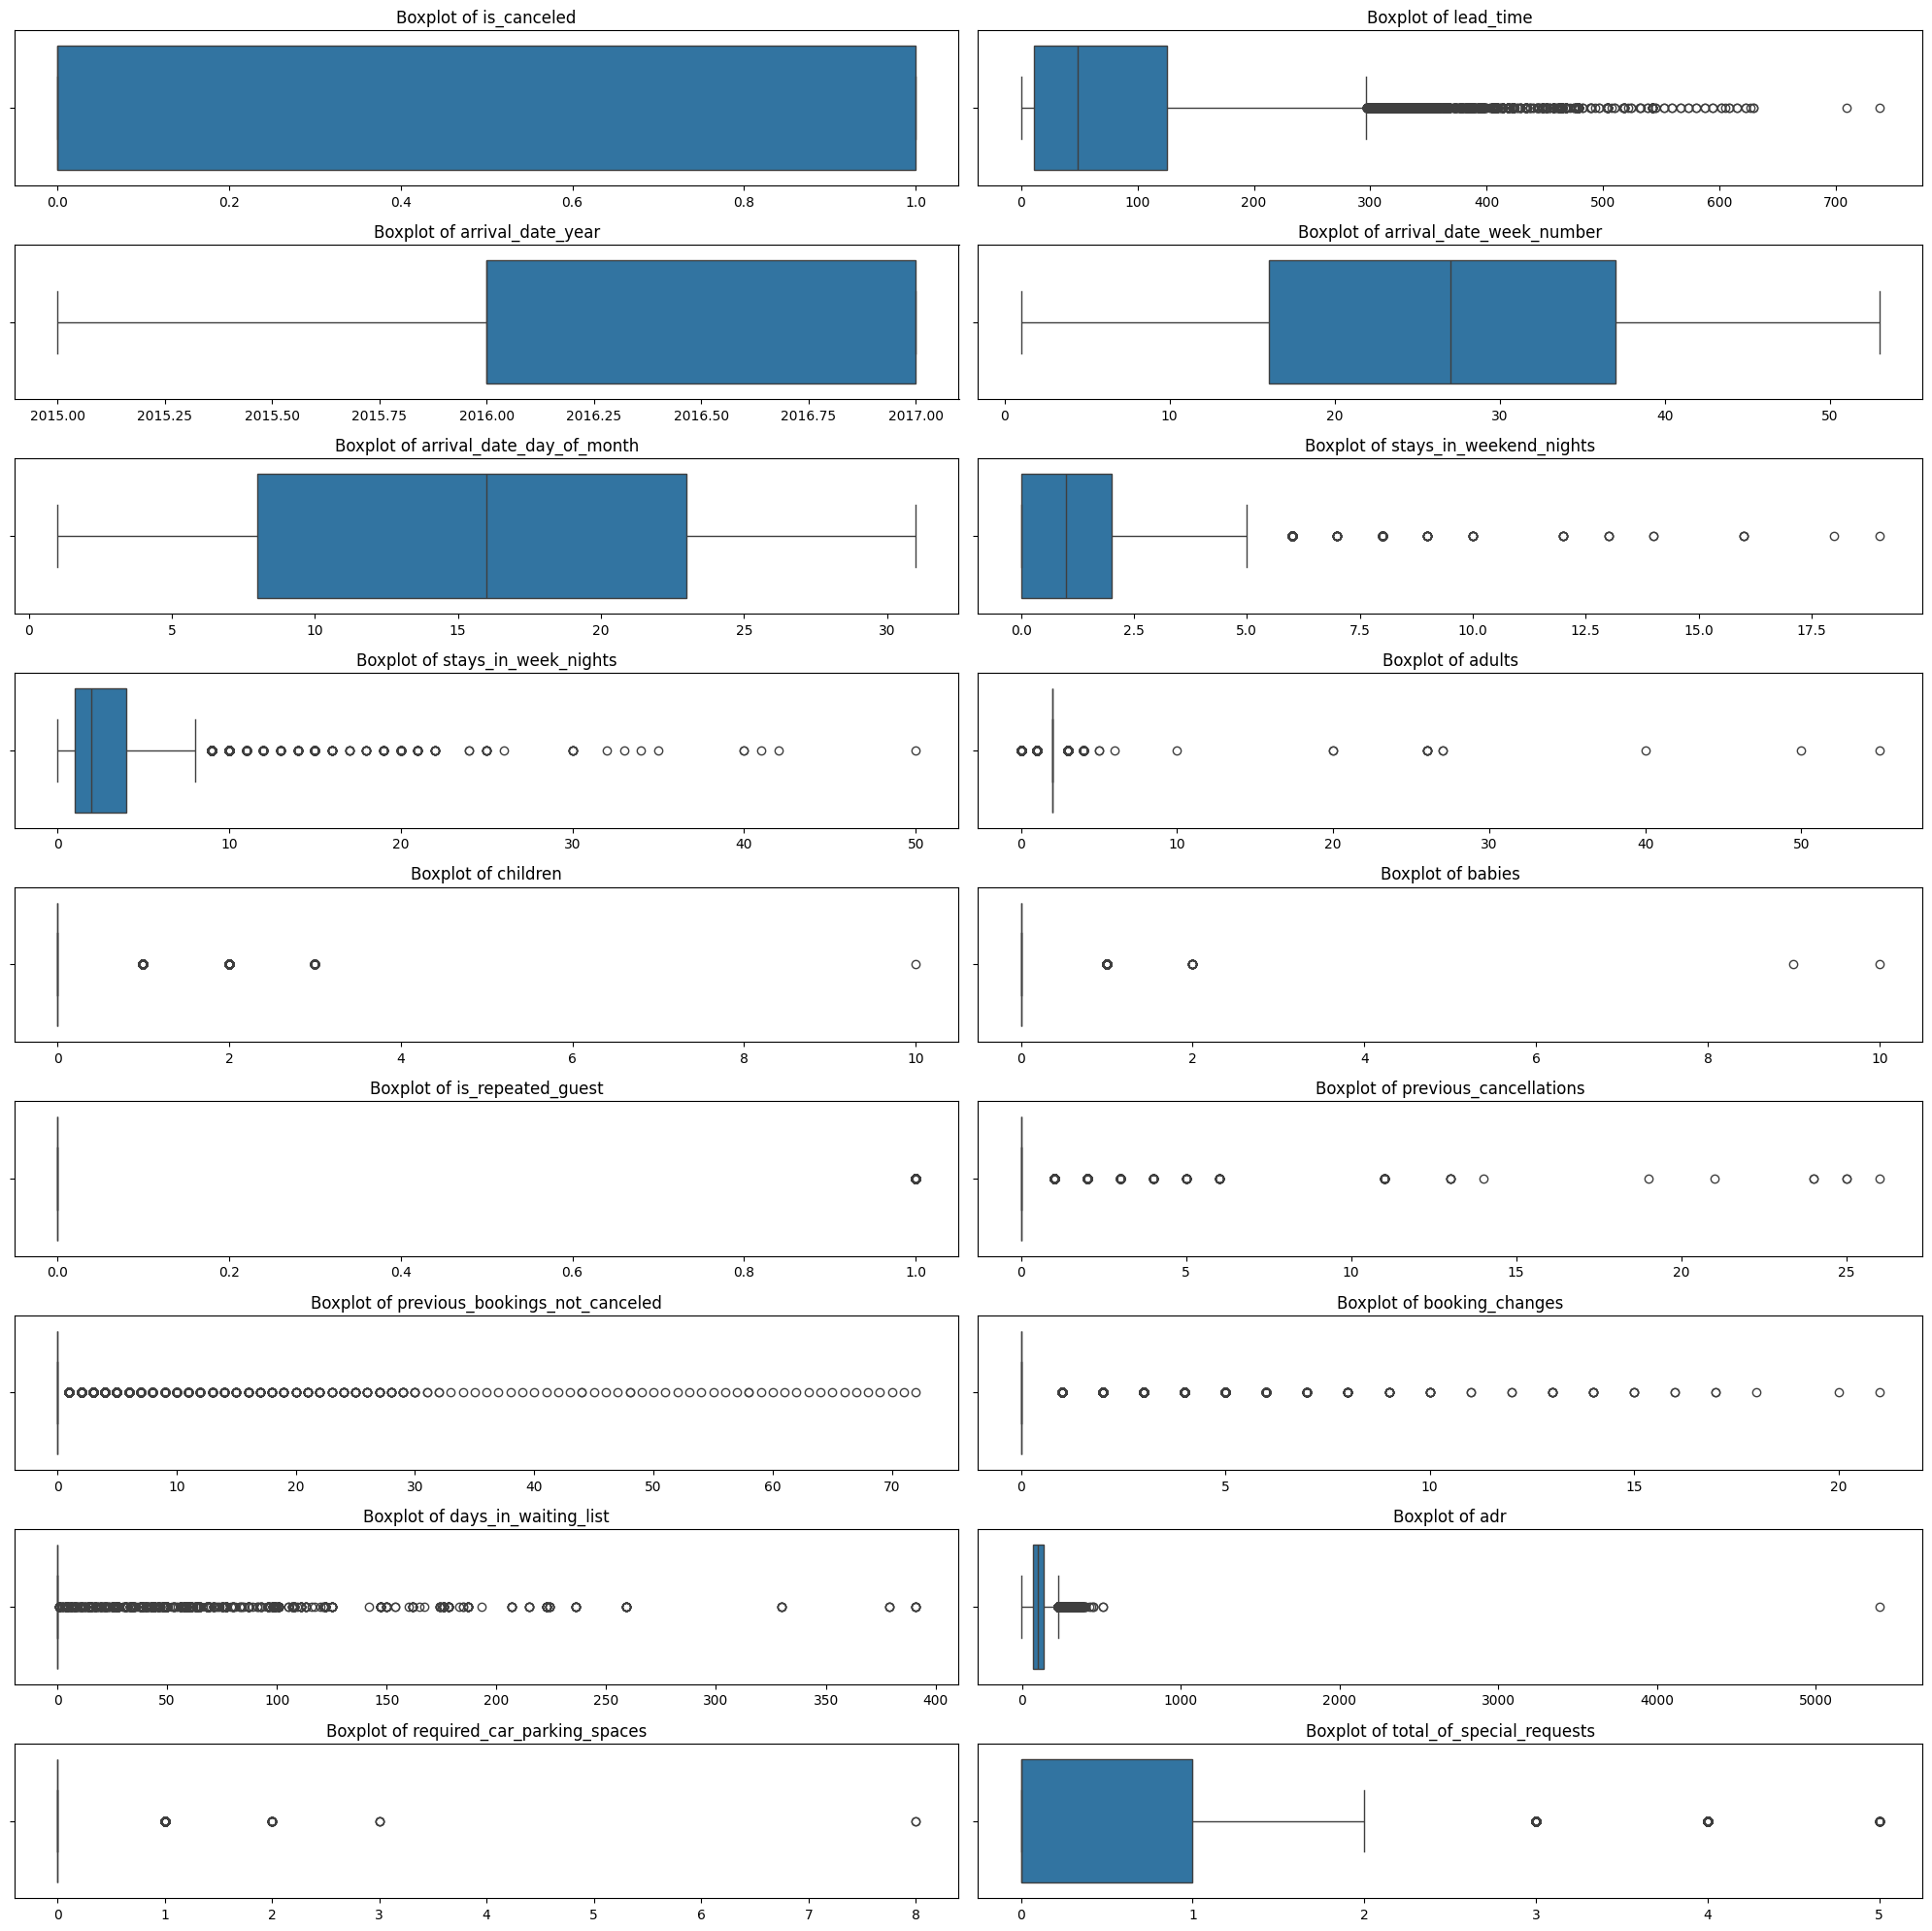

In [93]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(20, 20))
for i, column in enumerate(num_cols, 1):
    plt.subplot((len(num_cols) + 1) // 2, 2, i)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel('')

plt.tight_layout()
plt.show()

> Based on the boxplot above, we can see that the `adr` column has a single extreme outlier with a value greater than 1000. Since this is an isolated case, we choose to remove it to maintain data consistency and avoid skewing the analysis.

In [94]:
df = df[df['adr']<1000]

Next, we will check if there are any adr values that is below 0 as it is impossible for the hotel to owe the guest money.

<Axes: ylabel='adr'>

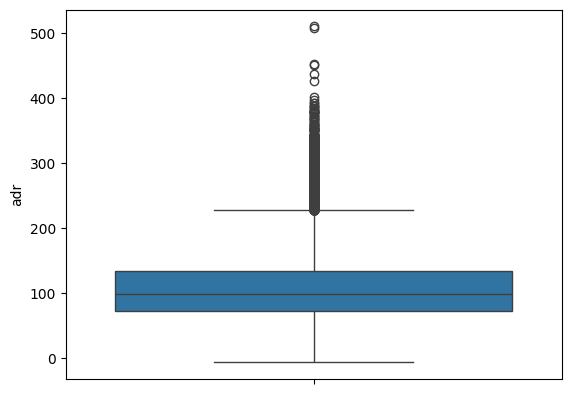

In [95]:
sns.boxplot(df['adr'])

In [96]:
# Remove negative adr
df = df[df['adr'] > 0]

### Handling Anomalies

> After observing the data, we found anomalies where bookings have `adults`, `children`, and `babies` all equal to `0`. These entries indicate invalid reservations since a hotel booking should include at least one person. Therefore, we choose to remove these anomalies to ensure data integrity.

In [97]:
df[(df['adults']==0)&(df['children']==0)&(df['babies']==0)]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
31765,Resort Hotel,0,31,2016,December,53,27,2,8,0,0,0,BB,PRT,Direct,Direct,0,0,0,D,D,3,No Deposit,Not Applicable,Not Applicable,0,Transient,28.00,1,0,Check-Out,2017-01-06
47444,City Hotel,0,48,2016,February,9,21,2,4,0,0,0,SC,CHE,Direct,Direct,0,0,0,B,K,2,No Deposit,14,Not Applicable,0,Transient-Party,56.27,0,0,Check-Out,2016-02-27
50701,City Hotel,0,122,2016,May,19,5,2,4,0,0,0,SC,PRT,Online TA,TA/TO,0,0,0,E,K,3,No Deposit,11,Not Applicable,0,Transient,50.87,0,0,Check-Out,2016-05-11
50702,City Hotel,0,122,2016,May,19,5,2,4,0,0,0,SC,CHE,Online TA,TA/TO,0,0,0,E,K,3,No Deposit,11,Not Applicable,0,Transient,50.87,0,0,Check-Out,2016-05-11
55809,City Hotel,0,256,2016,August,35,21,3,5,0,0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,K,1,No Deposit,11,Not Applicable,0,Transient,57.30,0,0,Check-Out,2016-08-29
78586,City Hotel,0,0,2015,November,49,30,1,2,0,0,0,SC,PRT,Corporate,Corporate,1,0,1,A,A,2,No Deposit,Not Applicable,40,0,Transient,6.00,0,0,Check-Out,2015-12-03
85931,City Hotel,0,9,2016,March,12,16,2,6,0,0,0,SC,NLD,Groups,TA/TO,0,0,0,A,K,2,No Deposit,29,Not Applicable,0,Transient,3.38,1,0,Check-Out,2016-03-24
88439,City Hotel,0,52,2016,April,18,30,2,4,0,0,0,SC,SWE,Direct,Direct,0,0,0,E,K,2,No Deposit,14,Not Applicable,0,Transient-Party,136.46,0,1,Check-Out,2016-05-06
92814,City Hotel,0,108,2016,July,28,5,2,5,0,0,0,SC,PRT,Online TA,TA/TO,0,0,0,A,K,0,No Deposit,89,Not Applicable,0,Transient,77.53,0,0,Check-Out,2016-07-12
92962,City Hotel,0,55,2017,March,10,5,2,0,0,0,0,SC,PRT,Corporate,Corporate,1,1,9,A,K,2,No Deposit,Not Applicable,40,0,Transient,1.00,1,0,Check-Out,2017-03-07


In [98]:
df = df[~((df['adults'] == 0) & (df['children'] == 0) & (df['babies'] == 0))]

> After removing rows where there are no guests, let's check if there are any rows where adults equal to 0 as bookings are only possible to be made by adults.

In [99]:
# Remove rows where adults = 0
df[(df['adults'] == 0)]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
40984,City Hotel,0,1,2015,August,33,10,1,1,0,3,0,BB,PRT,Direct,Direct,0,0,0,B,B,1,No Deposit,Not Applicable,Not Applicable,0,Transient-Party,9.00,0,0,Check-Out,2015-08-12
41048,City Hotel,0,104,2015,August,33,11,0,3,0,2,0,BB,FRA,Online TA,TA/TO,0,0,0,B,B,1,No Deposit,7,Not Applicable,0,Transient-Party,6.00,0,2,Check-Out,2015-08-14
41446,City Hotel,0,3,2015,August,34,16,2,0,0,2,0,BB,PRT,Direct,Direct,0,0,0,B,B,1,No Deposit,Not Applicable,Not Applicable,0,Transient-Party,6.00,0,1,Check-Out,2015-08-18
45158,City Hotel,1,48,2015,October,43,19,1,3,0,2,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,B,B,0,No Deposit,13,Not Applicable,0,Transient-Party,6.00,0,1,Canceled,2015-09-02
46132,City Hotel,1,6,2015,December,51,13,1,0,0,3,0,BB,PRT,Online TA,TA/TO,0,0,0,B,B,0,No Deposit,8,Not Applicable,0,Transient-Party,104.25,0,1,Canceled,2015-12-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117204,City Hotel,0,296,2017,July,30,27,1,3,0,2,0,BB,GBR,Online TA,TA/TO,0,0,0,B,A,0,No Deposit,9,Not Applicable,0,Transient,98.85,0,1,Check-Out,2017-07-31
117274,City Hotel,0,276,2017,July,31,30,2,1,0,2,0,BB,DEU,Online TA,TA/TO,0,0,0,B,B,1,No Deposit,9,Not Applicable,0,Transient,93.64,0,2,Check-Out,2017-08-02
117303,City Hotel,0,291,2017,July,30,29,2,2,0,2,0,BB,PRT,Online TA,TA/TO,0,0,0,B,A,0,No Deposit,9,Not Applicable,0,Transient,98.85,0,1,Check-Out,2017-08-02
117453,City Hotel,0,159,2017,July,31,31,1,3,0,2,0,SC,FRA,Online TA,TA/TO,0,0,0,A,A,1,No Deposit,9,Not Applicable,0,Transient,121.88,0,1,Check-Out,2017-08-04


In [100]:
df = df[~(df['adults'] == 0)]

---

In [101]:
df_cleaned = df.copy()
df_cleaned.to_csv('hotel_booking_cleaned.csv', index=False)

---

### Correlation and VIF Data

<Axes: >

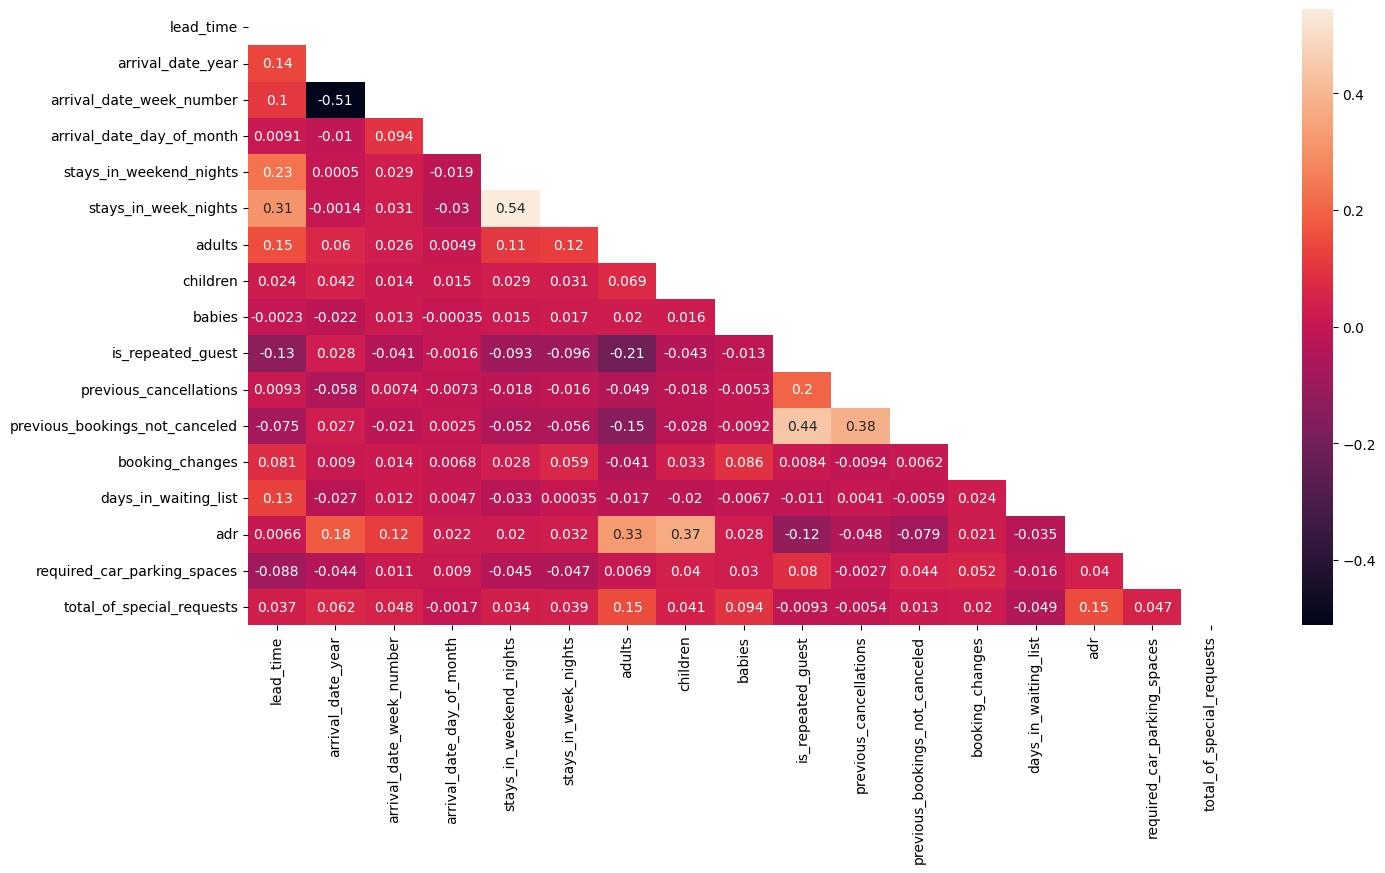

In [102]:
plt.figure(figsize=(16, 8))
num_corr = df.select_dtypes('number').drop(columns=['is_canceled']).corr()
matrix = np.triu(num_corr)
sns.heatmap(num_corr, annot=True, mask=matrix)

In [103]:
# Checking VIF for numerical features
num_features = df.select_dtypes(include=['int64', 'float64']).drop(columns=['is_canceled']).columns

vif_data = pd.DataFrame()
vif_data['Feature'] = num_features
vif_data['VIF'] = [variance_inflation_factor(df[num_features].values, i) for i in range(len(num_features))]

display(vif_data.sort_values(by='VIF', ascending=False))

,Feature,VIF
1,arrival_date_year,24.824279
6,adults,19.000374
14,adr,7.617560
2,arrival_date_week_number,5.046552
3,arrival_date_day_of_month,4.251145
5,stays_in_week_nights,4.068146
4,stays_in_weekend_nights,2.853152
0,lead_time,2.244043
16,total_of_special_requests,1.798854
11,previous_bookings_not_canceled,1.421913


> Based on the first calculated VIF values, we observe that the `arrival_date_year` feature has a `VIF` above  `20`, which is significantly higher than the threshold of `10`. This indicates a strong multicollinearity issue, meaning it is highly correlated with other features.

To improve model performance and reduce redundancy, we will drop the arrival_date_year column.

In [104]:
df.drop(columns=['arrival_date_year'], inplace=True)

In [105]:
num_features = df.select_dtypes(include=['int64', 'float64']).drop(columns=['is_canceled']).columns

vif_data = pd.DataFrame()
vif_data['Feature'] = num_features
vif_data['VIF'] = [variance_inflation_factor(df[num_features].values, i) for i in range(len(num_features))]

display(vif_data.sort_values(by='VIF', ascending=False))

,Feature,VIF
5,adults,10.692035
13,adr,7.390160
1,arrival_date_week_number,4.540859
4,stays_in_week_nights,3.993795
2,arrival_date_day_of_month,3.801619
3,stays_in_weekend_nights,2.848520
0,lead_time,2.244014
15,total_of_special_requests,1.798738
10,previous_bookings_not_canceled,1.417409
8,is_repeated_guest,1.299515


> After recalculating the `VIF`, we observe that most of the remaining features have `VIF scores below 10`. Only `adults` have a value that is around `10`.

<Axes: >

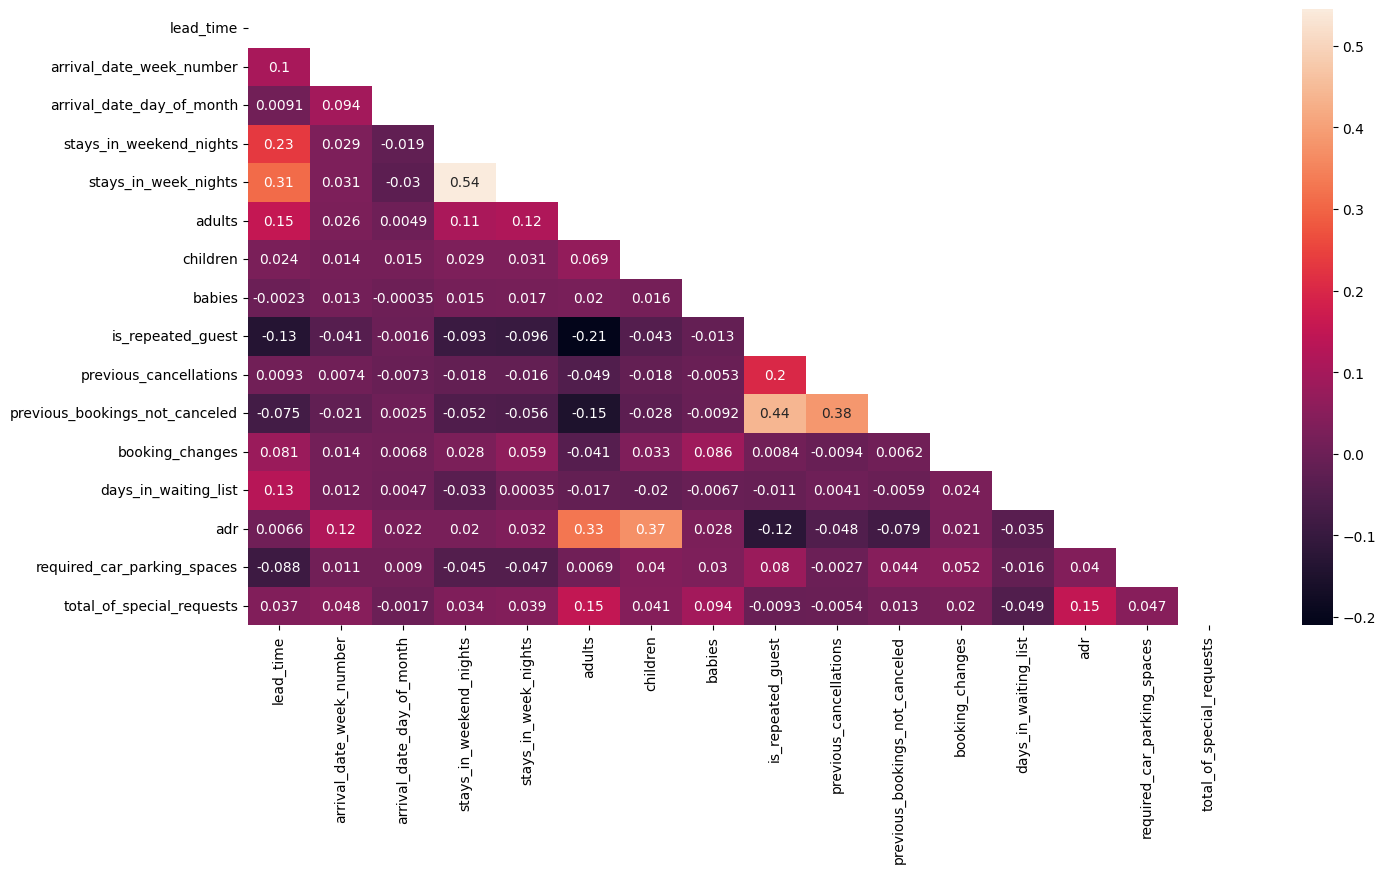

In [106]:
plt.figure(figsize=(16, 8))
num_corr = df.select_dtypes('number').drop(columns=['is_canceled']).corr()
matrix = np.triu(num_corr)
sns.heatmap(num_corr, annot=True, mask=matrix)

## Feature Engineering
Based on the elimination of the arrival date, the VIF value for `adults` is still more than 10. We decided to create new feature called `total_guests`. In context, this feature also represent that hotels prioritize the total number of guests per booking, regardless of whether they are adults or children. It helps in demand forecasting and resource allocation.

In [107]:
df['total_guests'] = df['adults'] + df['children'] + df['babies']

In [108]:

df['is_family'] = ((df['children'] > 0) | (df['babies'] > 0)).astype('category')

df[['adults', 'children', 'babies', 'is_family']].head()

,adults,children,babies,is_family
2,1,0,0,False
3,1,0,0,False
4,2,0,0,False
6,2,0,0,False
7,2,0,0,False


After creating two new features, we drop the initial columns children, babies and, adults. Next, we will examine the new VIF number and correlation plot.

In [109]:
df.drop(columns=['children', 'babies', 'adults'], inplace=True)

,Feature,VIF
13,total_guests,9.652752
10,adr,7.310226
1,arrival_date_week_number,4.351448
4,stays_in_week_nights,3.950251
2,arrival_date_day_of_month,3.640335
3,stays_in_weekend_nights,2.844064
0,lead_time,2.227741
12,total_of_special_requests,1.771244
7,previous_bookings_not_canceled,1.417072
5,is_repeated_guest,1.298936


<Axes: >

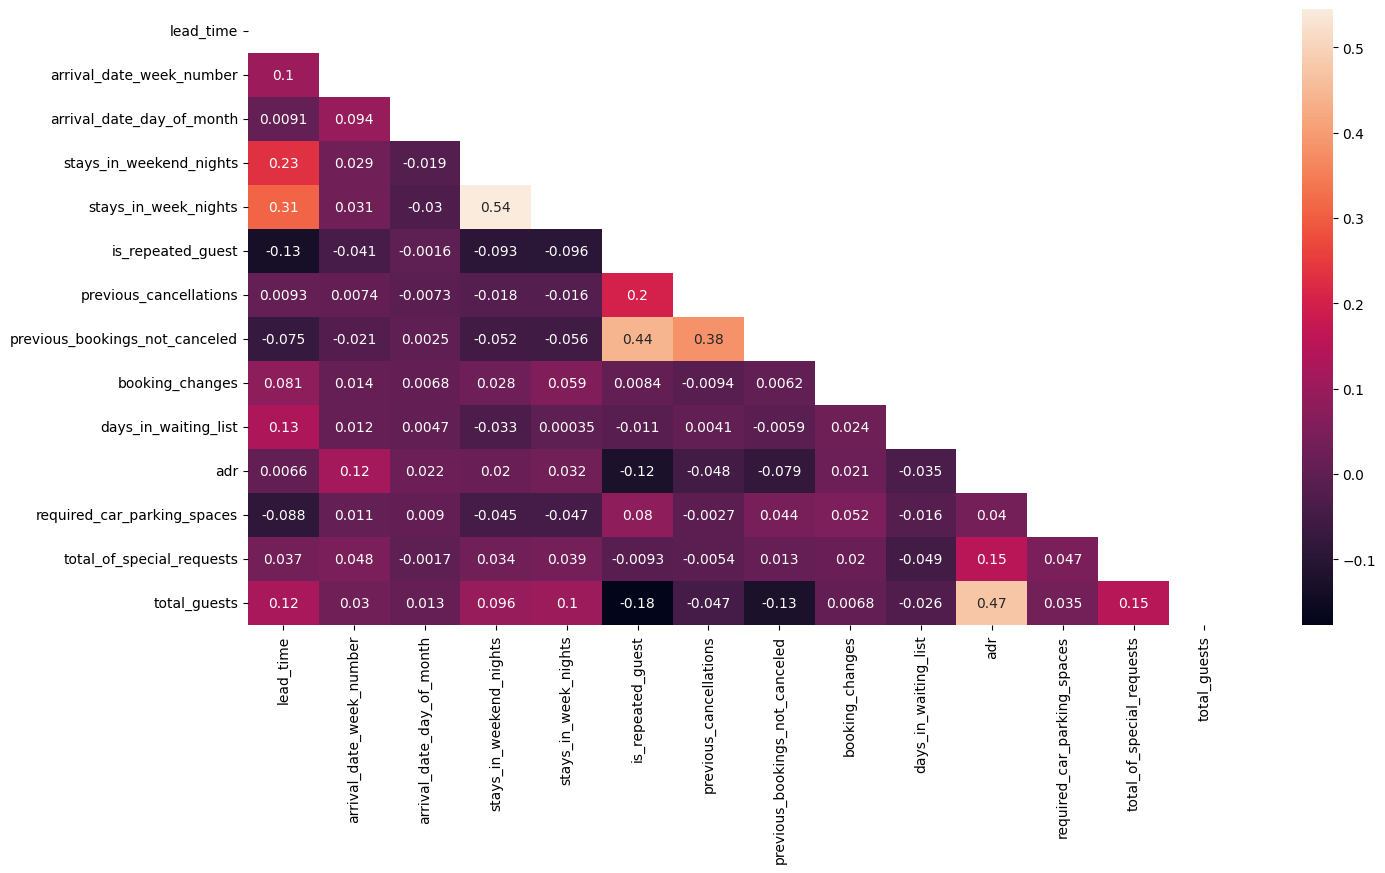

In [110]:
num_features = df.select_dtypes(include=['int64', 'float64']).drop(columns=['is_canceled']).columns

vif_data = pd.DataFrame()
vif_data['Feature'] = num_features
vif_data['VIF'] = [variance_inflation_factor(df[num_features].values, i) for i in range(len(num_features))]

display(vif_data.sort_values(by='VIF', ascending=False))


plt.figure(figsize=(16, 8))
num_corr = df.select_dtypes('number').drop(columns=['is_canceled']).corr()
matrix = np.triu(num_corr)
sns.heatmap(num_corr, annot=True, mask=matrix)

After adding is_family and total_guests, we can see that there still high correlation for stay_in_week_nights with stays_in_weekend_nights. So we try to combine this 2 features into one features because:

1. Business Relevance <br>
Hotels care about total nights stayed, not just whether they fall on a weekend or weekday.
For revenue forecasting, room availability, and resource planning, the total duration of a stay is more important than its breakdown.
2. Simpler Model & Less Redundancy <br>
Instead of treating weekend and weekday stays as separate features, a combined total_nights feature reduces dimensionality and potential multicollinearity.
The model can still capture trends if weekend stays are more popular by analyzing booking dates and seasonality.
3. Customer Behavior Insights <br>
Understanding whether guests stay for short or long periods is more actionable than differentiating between weekend and weekday nights.
Example: Business travelers may stay 1-3 nights, while families might stay longer.

In [111]:
df['total_nights'] = df['stays_in_week_nights'] + df['stays_in_weekend_nights']
df.drop(columns=['stays_in_week_nights', 'stays_in_weekend_nights'], inplace=True)

,Feature,VIF
11,total_guests,9.652480
8,adr,7.306688
1,arrival_date_week_number,4.351443
2,arrival_date_day_of_month,3.640317
12,total_nights,2.999129
0,lead_time,2.226190
10,total_of_special_requests,1.771244
5,previous_bookings_not_canceled,1.417071
3,is_repeated_guest,1.298463
4,previous_cancellations,1.185787


<Axes: >

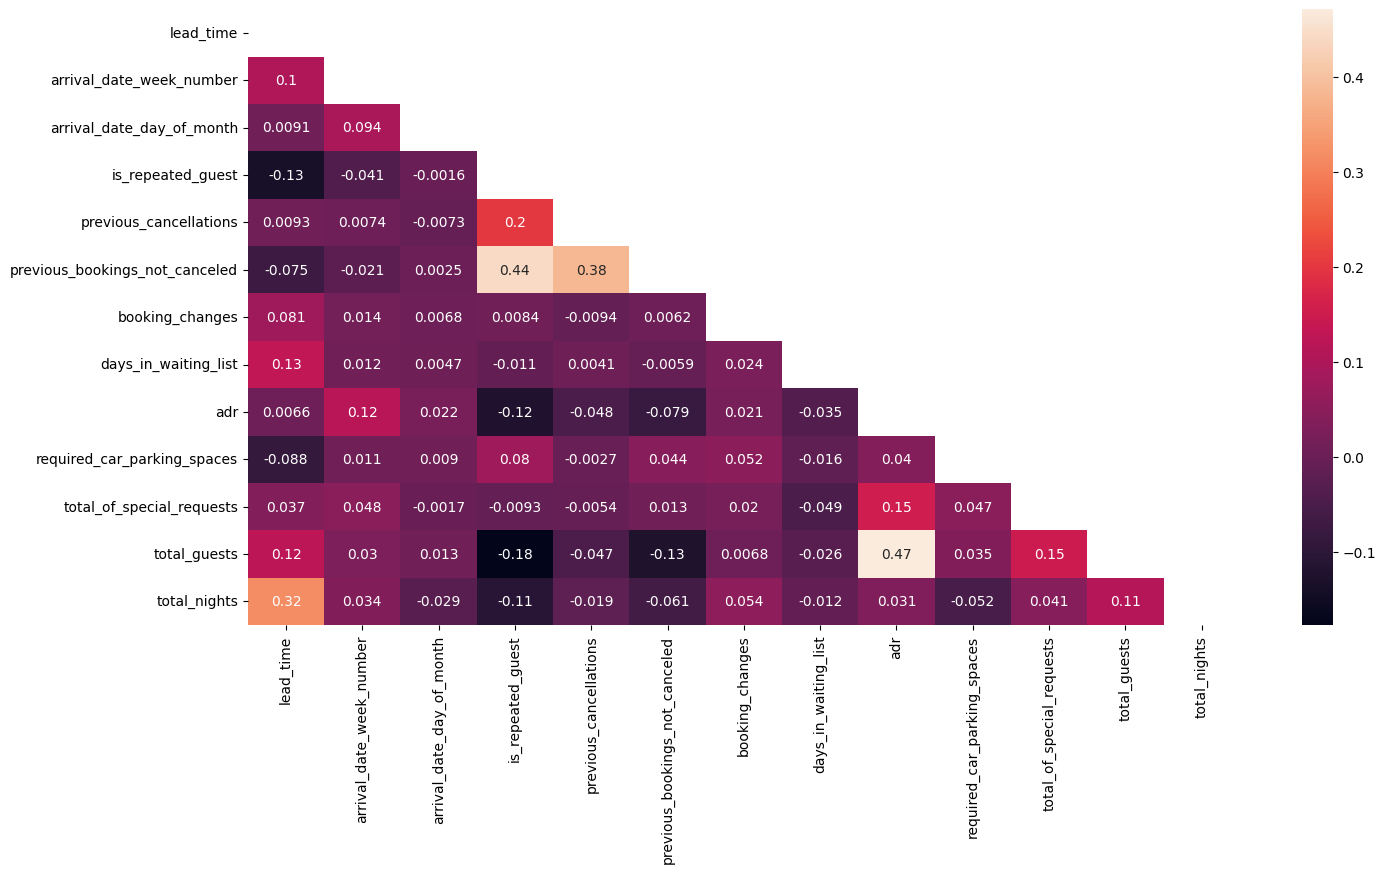

In [112]:
num_features = df.select_dtypes(include=['int64', 'float64']).drop(columns=['is_canceled']).columns

vif_data = pd.DataFrame()
vif_data['Feature'] = num_features
vif_data['VIF'] = [variance_inflation_factor(df[num_features].values, i) for i in range(len(num_features))]

display(vif_data.sort_values(by='VIF', ascending=False))


plt.figure(figsize=(16, 8))
num_corr = df.select_dtypes('number').drop(columns=['is_canceled']).corr()
matrix = np.triu(num_corr)
sns.heatmap(num_corr, annot=True, mask=matrix)

### Correlation with Target Variable

In [113]:
correlation = df.select_dtypes(include=['int64', 'float64']).corr()['is_canceled'].abs().sort_values(ascending = False)
correlation

,is_canceled
is_canceled,1.000000
required_car_parking_spaces,0.186599
lead_time,0.182557
adr,0.123802
total_of_special_requests,0.122733
total_guests,0.099791
booking_changes,0.092262
is_repeated_guest,0.082199
total_nights,0.080352
previous_cancellations,0.053293


In [114]:
from scipy.stats import chi2_contingency

cat_cols = df.select_dtypes(include='object').columns

def calculate_chi2(cols):
    chi2_results = {}

    for col in cols:
        col_ct = pd.crosstab(df[col], df['is_canceled'])
        chi2, p, dof, expected = chi2_contingency(col_ct)
        result = 'Reject H0' if p < 0.05 else 'Accept H0'
        chi2_results[col] = {'Chi2': round(chi2,2), 'p-value': p, 'result' : result}

    chi2_results_df = pd.DataFrame(chi2_results).T

    return chi2_results_df.sort_values(by='p-value')

calculate_chi2(cat_cols)

,Chi2,p-value,result
country,3611.16,0.0,Reject H0
market_segment,4154.48,0.0,Reject H0
distribution_channel,1951.36,0.0,Reject H0
deposit_type,2337.51,0.0,Reject H0
agent,7430.33,0.0,Reject H0
reservation_status,85368.0,0.0,Reject H0
customer_type,1429.78,0.0,Reject H0
assigned_room_type,661.52,0.0,Reject H0
hotel,450.54,0.0,Reject H0
company,1071.52,0.0,Reject H0


## Exploratory Data Analysis

### How Many Bookings Get Canceled?



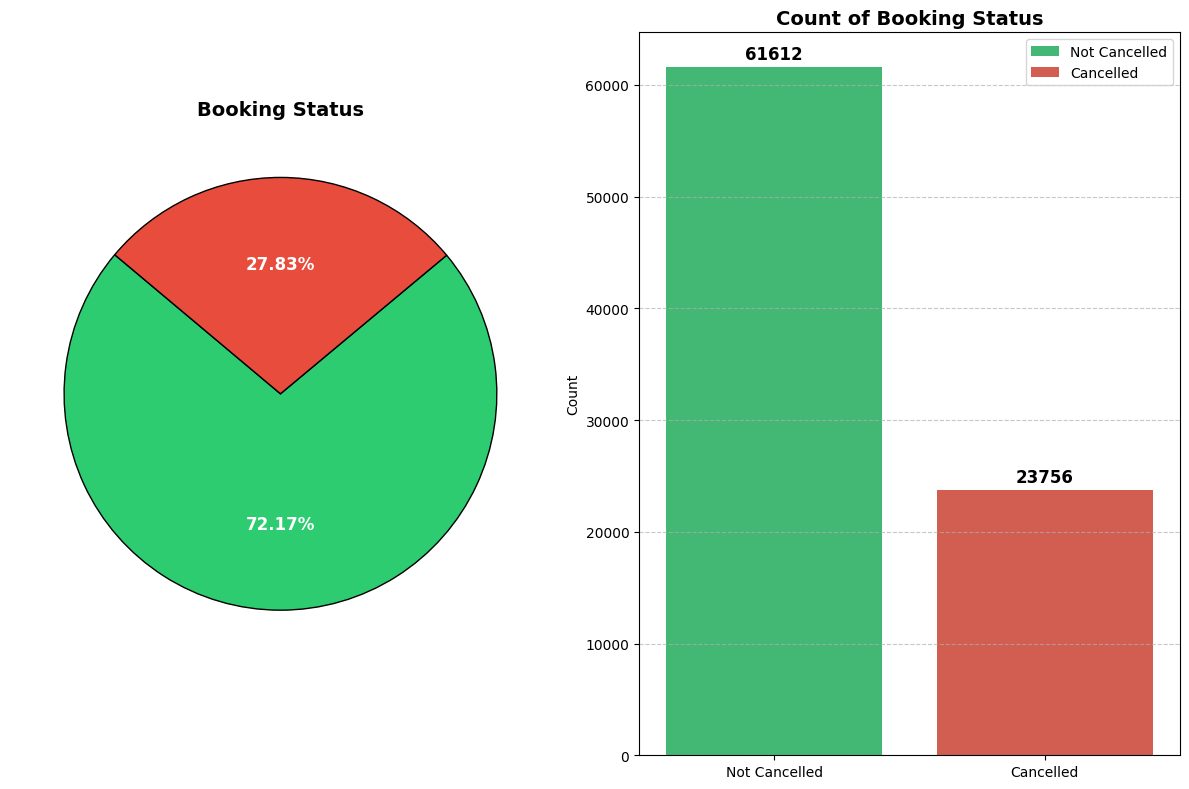

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
plt.subplots_adjust(left=0.05, right=0.95, top=0.85, bottom=0.15, wspace=0.3)

# Pie Chart
plt.subplot(1, 2, 1)
colors = ['#2ecc71', '#e74c3c']
plt.pie(
    df['is_canceled'].value_counts(),
    autopct='%.2f%%',
    labels=['Not Cancelled', 'Cancelled'],
    colors=colors,
    startangle=140,
    wedgeprops={'edgecolor': 'black'},
    textprops={'fontsize': 12, 'fontweight': 'semibold','color':'white'}
)
plt.title('Booking Status', fontsize=14, fontweight='bold')

# Bar Chart
plt.subplot(1, 2, 2)
ax = sns.countplot(data=df, x='is_canceled', hue='is_canceled', palette=colors)
for container in ax.containers:
    ax.bar_label(container, fmt='%d', padding=3, fontsize=12, fontweight='semibold')

plt.xticks([0, 1], ['Not Cancelled', 'Cancelled'])
plt.xlabel('')
plt.ylabel('Count')
plt.title('Count of Booking Status', fontsize=14, fontweight='bold')
plt.legend(['Not Cancelled', 'Cancelled'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

Approximately 27.5% of the guests cancelled their bookings, which indicates that our data is mildly imbalanced. If needed, we can apply a resampling method to balance the data and evaluate whether it improves our model performance.

### When are People Most Likely to Book a Hotel?

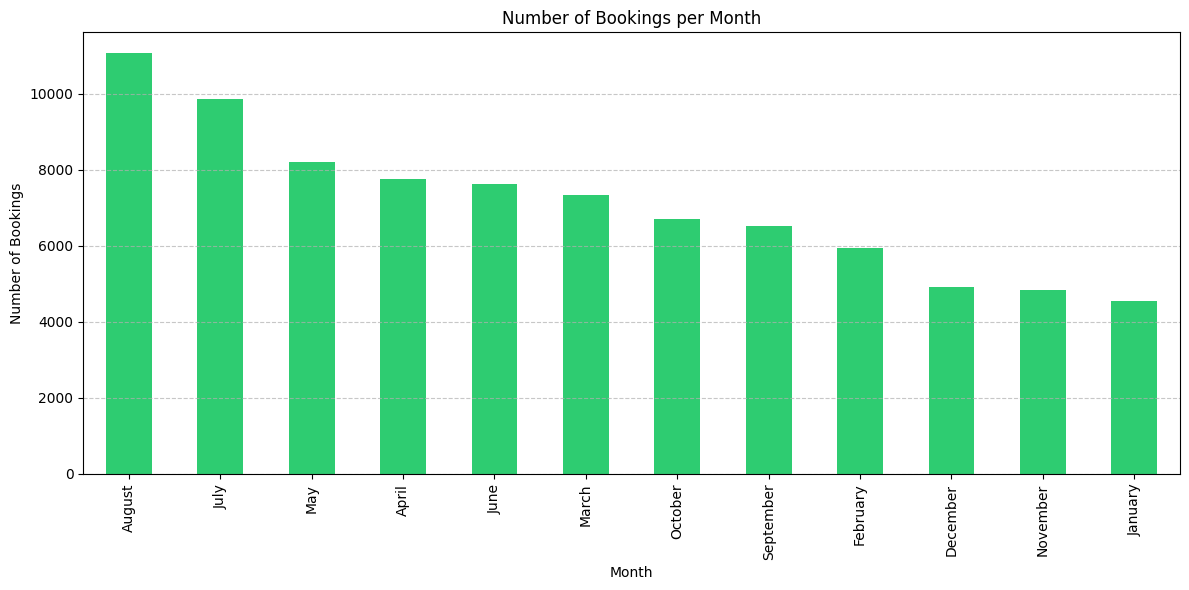

In [116]:
df['arrival_date_month'].value_counts().plot(kind='bar', figsize=(12,6),color='#2ecc71')
plt.title("Number of Bookings per Month")
plt.xlabel("Month")
plt.ylabel("Number of Bookings")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Based on the graph above, **August and July** have the highest number of bookings, indicating a peak season, possibly due to summer vacations. On the other hand, **January, November, and December** have the lowest number of bookings, suggesting an off-season period.

This pattern is crucial for **hotel management**, as they can optimize **pricing strategies, staffing, and promotional efforts** to maximize revenue during peak months and improve occupancy during low-demand periods.

**Peak Season**
- Adjust pricing to reflect demand
- Promote local events and attractions to attract guests' interest

**Off-Season**
- Offer themed packages for events such as New Year's Eve.
- Provide special off-season discounts and special offers.
- Increase sosial media engagement to maintain brand presence.

### How do Cancellation Rates vary between Hotels?


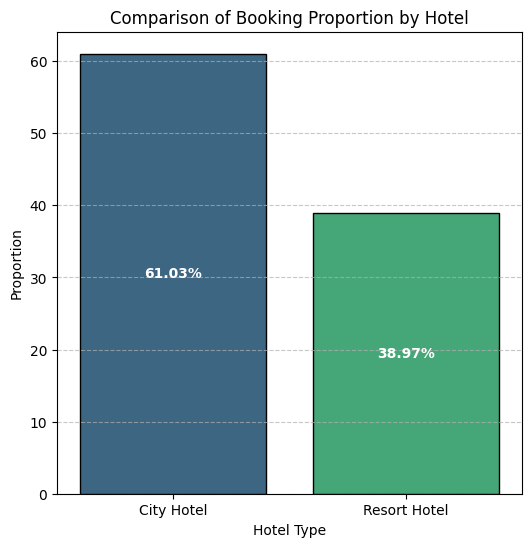

In [117]:
hotel_counts = df['hotel'].value_counts(normalize=True).sort_values(ascending=False).reset_index()
hotel_counts['proportion'] = hotel_counts['proportion'].apply(lambda x: round(x*100, 2))

plt.figure(figsize=(6,6))
ax = sns.barplot(data=hotel_counts, x='hotel', y='proportion', hue='hotel', palette='viridis', edgecolor='black')

for bars in ax.containers:
    ax.bar_label(bars, fmt='%.2f%%', label_type='center', color='white', weight='semibold')

plt.title(f'Comparison of Booking Proportion by Hotel')
plt.xlabel('Hotel Type')
plt.ylabel('Proportion')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The City Hotel accounts for approximately **61%** of total bookings, while the Resort Hotel accounts for **39%**. While this suggests that City Hotel has significantly higher demand compared to Resort Hotel, we may need to consider the difference in capacity of the two hotels. We will analyze cancellation rates relative to the total bookings for each hotel to better understand if one hotel is more prone to cancellation than the other.


<Figure size 1500x1000 with 0 Axes>

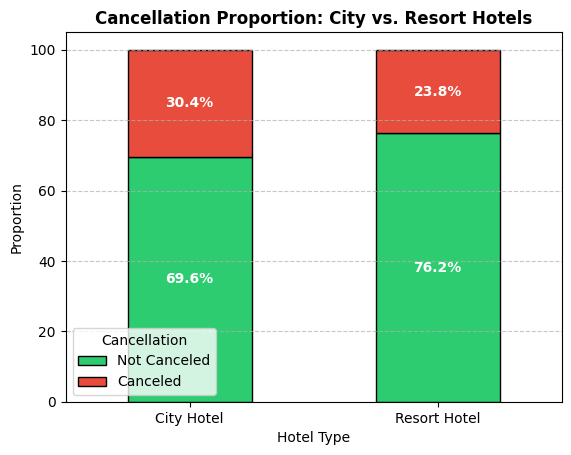

In [118]:
plt.figure(figsize=(15, 10))
cancellation_data = pd.crosstab(df['hotel'], df['is_canceled'], normalize=0)*100

ax = cancellation_data.plot(kind='bar', stacked=True, color=['#2ecc71', '#e74c3c'], edgecolor='black')

for bars in ax.containers:
    ax.bar_label(bars, fmt='%.1f%%', label_type='center', color='white', weight='semibold')

plt.legend(title='Cancellation', labels=['Not Canceled', 'Canceled'])
plt.title('Cancellation Proportion: City vs. Resort Hotels', fontweight='bold')
plt.xlabel('Hotel Type')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.yticks()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


Based on the graph above, City Hotel have slightly higher cancellation rate at about **30%** compared to about **24%** for Resort Hotel.

### Which Market Segment have the highest cancellation rate?


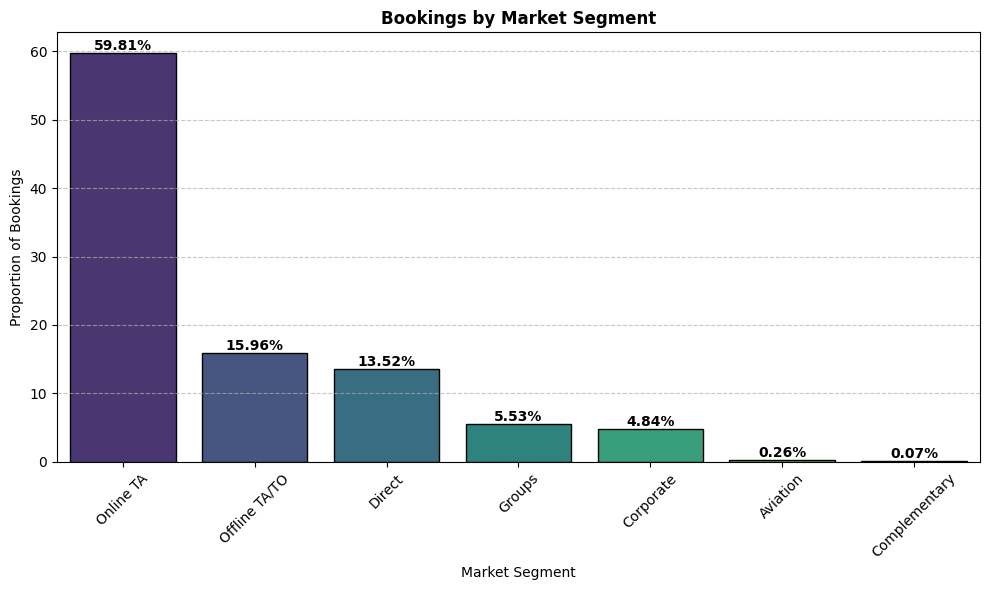

In [119]:
market_count = df['market_segment'].value_counts(normalize=True).reset_index()
market_count.columns = ['Market Segment', 'Proportion']
market_count['Proportion'] = market_count['Proportion'].apply(lambda x: round(x*100, 2))

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=market_count, x='Market Segment', y='Proportion',hue='Market Segment', palette='viridis', edgecolor='black')

for bars in ax.containers:
    ax.bar_label(bars, fmt='%.2f%%', label_type='edge', weight='semibold')

plt.title('Bookings by Market Segment', fontweight='bold')
plt.xlabel('Market Segment')
plt.ylabel('Proportion of Bookings')
plt.xticks(rotation=45)
plt.yticks()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


- Online TA dominates the market accounting for approximately 60% of total bookings. This suggests that the majority of customers prefer to use online platforms.
- Offline TA/TO and Direct both have over 10% of share while the rest of the segments combined accounts to about 10%.

<Figure size 2000x800 with 0 Axes>

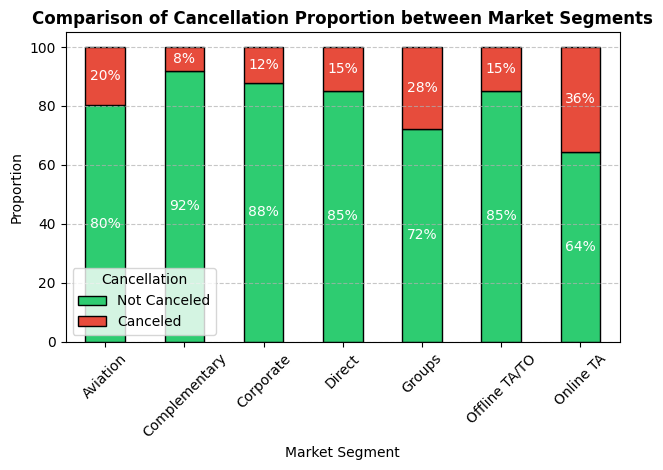

In [120]:
plt.figure(figsize=(20,8))
cancellation_data = pd.crosstab(df['market_segment'], df['is_canceled'], normalize=0)*100

ax = cancellation_data.plot(kind='bar', stacked=True, color=['#2ecc71', '#e74c3c'], edgecolor='black')

for container in ax.containers:
    ax.bar_label(container, fmt="%.f%%", label_type='center', color='white',fontweight='medium')

plt.legend(title='Cancellation', labels=['Not Canceled', 'Canceled'])
plt.title('Comparison of Cancellation Proportion between Market Segments', fontweight='bold')
plt.xlabel('Market Segment')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.yticks()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

- Online TA has the highest cancellation rate with 35% of bookings through this segment cancelled.
- The Direct and Offline TA/TO segments, the second and third highest segments in total bookings, have a relatively low cancellation rate of 15%.
- While the Aviation and Group segments account for a smaller percentage of overall bookings,  they have a relatively high cancellation rate, at 20% and 27% respectively.

**Strategies**

**Offline TA/TO** and **Direct** are the second and third highest segments in total bookings while also having relatively low cancellation rates, making them the most attractive markets for maximizing bookings.
- Strengthen partnerships with existing travel agents
- Offer discounts and free upgrades such as free breakfasts for direct bookings
- Enhance website or mobile booking apps to offer smooth booking experience

### How do cancellation rates vary between Deposit Types?

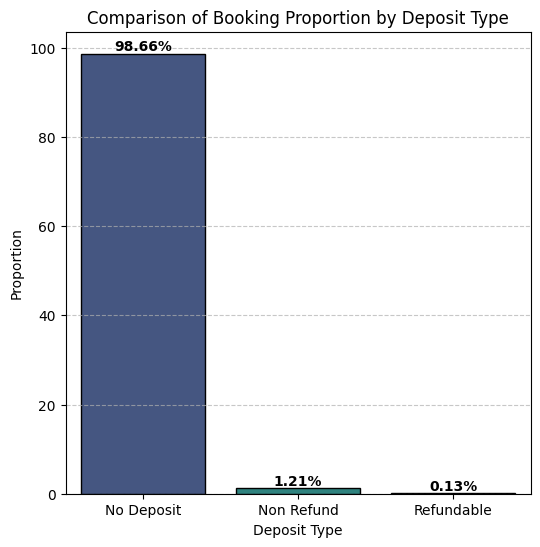

In [121]:
deposit_counts= df['deposit_type'].value_counts(normalize=True).sort_values(ascending=False).reset_index()
deposit_counts['proportion'] = deposit_counts['proportion'].apply(lambda x: round(x*100, 2))

plt.figure(figsize=(6,6))
ax = sns.barplot(data=deposit_counts, x='deposit_type', y='proportion', hue='deposit_type', palette='viridis', edgecolor='black')

for bars in ax.containers:
    ax.bar_label(bars, fmt='%.2f%%', label_type='edge', color='black', weight='semibold')

plt.title(f'Comparison of Booking Proportion by Deposit Type')
plt.xlabel('Deposit Type')
plt.ylabel('Proportion')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

- Around 98% of bookings were made with no deposit.
- While bookings with non-refundable or refundable deposits help hotels mitigate revenue loss from cancellations, they collectively represent less than 2% of total bookings.

<Figure size 1500x800 with 0 Axes>

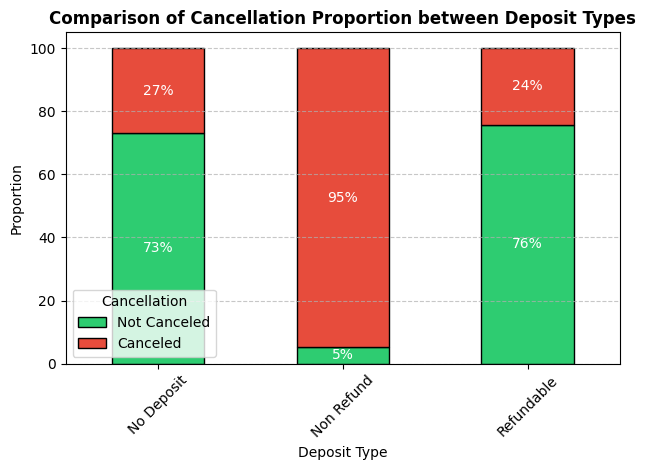

In [122]:
plt.figure(figsize=(15,8))
deposit_cancel = pd.crosstab(df['deposit_type'], df['is_canceled'], normalize=0)*100

ax = deposit_cancel.plot(kind='bar', stacked=True, color=['#2ecc71', '#e74c3c'], edgecolor='black')

for container in ax.containers:
    ax.bar_label(container, fmt="%.f%%", label_type='center', color='white',fontweight='medium')

plt.legend(title='Cancellation', labels=['Not Canceled', 'Canceled'])
plt.title('Comparison of Cancellation Proportion between Deposit Types', fontweight='bold')
plt.xlabel('Deposit Type')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.yticks()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

- Non-refundable deposits unexpectedly have the highest cancellation rate at 95%. While this mitigates revenue loss, non-refundable only represents less than 2% of total bookings.
- Of the 99% total bookings with no deposit, 27% of them are canceled.



### How does Lead Time affect Cancellation?

In [123]:
import scipy.stats as stats

In [124]:
# T-Test: Lead Time vs. Cancellation
lead_time_canceled = df[df['is_canceled'] == 1]['lead_time']
lead_time_not_canceled = df[df['is_canceled'] == 0]['lead_time']
t_lead, p_lead = stats.ttest_ind(lead_time_canceled, lead_time_not_canceled, equal_var=False)
print(f"T-Test - Lead Time vs. Cancellation: t={t_lead}, p={p_lead}")
print('Reject H0' if p_lead < 0.05 else 'Accept H0')


T-Test - Lead Time vs. Cancellation: t=51.5332105569467, p=0.0
Reject H0


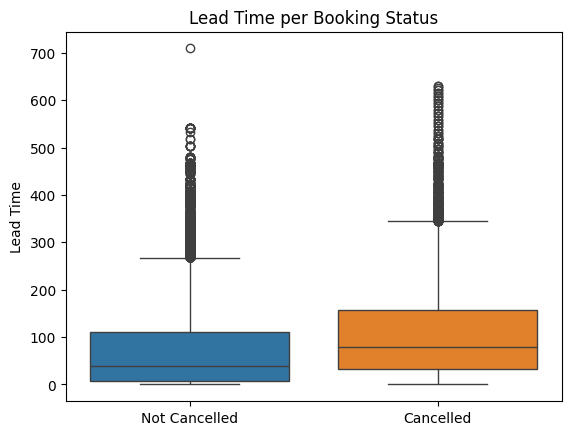

In [125]:
sns.boxplot(data=df, x='is_canceled', y='lead_time', hue = 'is_canceled', legend=False)
plt.title('Lead Time per Booking Status')
plt.xticks([0, 1], ['Not Cancelled', 'Cancelled'])
plt.xlabel('')
plt.ylabel('Lead Time')
plt.show()

- The result of our T-Test indicates that there is a significant difference between lead time for non-cancelled and cancelled bookings.
- As shown in the boxplot above, cancelled bookings tend to have longer lead time compared to the completed bookings.

### How does Average Daily Rate (ADR) affect Cancellation?

In [126]:
adr_canceled = df[df['is_canceled'] == 1]['adr']
adr_not_canceled = df[df['is_canceled'] == 0]['adr']
t_adr, p_adr = stats.ttest_ind(adr_canceled, adr_not_canceled, equal_var=False)
print(f"T-Test - ADR vs. Cancellation: t={t_adr}, p={p_adr}")
print('Reject H0' if p_adr < 0.05 else 'Accept H0')

T-Test - ADR vs. Cancellation: t=35.87436882330206, p=1.2847558943072627e-277
Reject H0


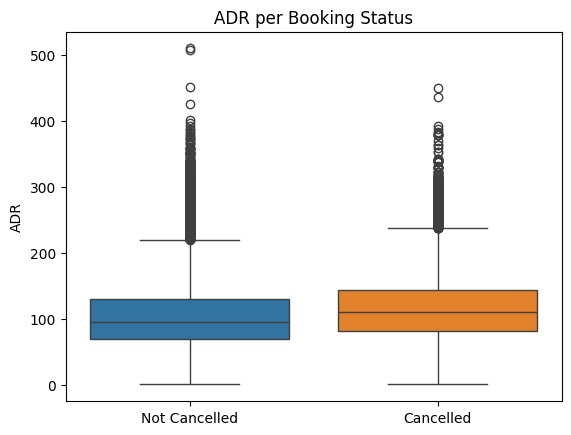

In [127]:
sns.boxplot(data=df, x='is_canceled', y='adr', hue = 'is_canceled', legend=False)
plt.title('ADR per Booking Status')
plt.xticks([0, 1], ['Not Cancelled', 'Cancelled'])
plt.xlabel('')
plt.ylabel('ADR')
plt.show()

- There is a significant difference in ADR for cancelled and non-cancelled bookings. The median ADR for cancelled bookings is slightly higher than non-cancelled ones.

## Machine Learning Modelling

In [128]:
logreg = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
lgbm = lgb.LGBMClassifier(verbose=-1)

Before starting our model benchmarking, we will drop the following columns:
- `reservation_status`: Reservation status is only determined once the booking outcome is finalized, making it unsuitable to predict cancellation.
- `assigned_room_type` : Assigned room type happens upon guest check-in, so it cannot be used as a meaningful predictor.

In [129]:
drop_cols = ['is_canceled', 'reservation_status', 'assigned_room_type', 'reservation_status_date']

In [ ]:
X = df.drop(columns=drop_cols)
y = df["is_canceled"]

numerical_features = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_nominal = [
    "hotel", "meal", "market_segment", "distribution_channel",
    "customer_type", "deposit_type", "reserved_room_type"
]
categorical_high_cardinality = ["country", "agent", "company"]
categorical_ordinal = ["arrival_date_month"]

month_order = [
    "January", "February", "March", "April", "May", "June", "July", "August",
    "September", "October", "November", "December"
]
ordinal_encoder = OrdinalEncoder(categories=[month_order])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", Pipeline([
            ("imputer", SimpleImputer(strategy="mean")),
            ("scaler", StandardScaler())
        ]), numerical_features),

        ("nominal", OneHotEncoder(handle_unknown="ignore"), categorical_nominal),
        ("high_cardinality", BinaryEncoder(), categorical_high_cardinality),
        ("ordinal", ordinal_encoder, categorical_ordinal),
    ]
)

resampling_methods = {
    "No Handling": None,
    "SMOTE": SMOTE(random_state=42),
    "Undersampling": RandomUnderSampler(random_state=42),
}

models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(eval_metric="logloss"),
    "LightGBM": LGBMClassifier(),
}

f2 = make_scorer(fbeta_score, beta=2)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

def benchmark_model(model, resampling):
    if resampling:
        pipeline = ImbPipeline([
            ("preprocessor", preprocessor),
            ("resampling", resampling),
            ("classifier", model)
        ])
    else:
        pipeline = Pipeline([
            ("preprocessor", preprocessor),
            ("classifier", model)
        ])

    recall_train = cross_val_score(pipeline, X_train, y_train, cv=5, scoring="recall")
    f2_train = cross_val_score(pipeline, X_train, y_train, cv=5, scoring=f2)

    pipeline.fit(X_train, y_train)

    y_pred = pipeline.predict(X_test)
    recall_test = recall_score(y_test, y_pred)
    f2_test = fbeta_score(y_test, y_pred, beta=2)

    return {
        "Recall Mean (Train)": np.mean(recall_train),
        "Recall Std (Train)": np.std(recall_train),
        "Recall (Test)": recall_test,
        "F2 Mean (Train)": np.mean(f2_train),
        "F2 Std (Train)": np.std(f2_train),
        "F2 (Test)": f2_test
    }

results = {}

for resample_name, resampling in resampling_methods.items():
    for model_name, model in models.items():
        key = f"{model_name} | {resample_name}"
        results[key] = benchmark_model(model, resampling)

results_df = pd.DataFrame(results).T

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[LightGBM] [Info] Number of positive: 15204, number of negative: 39431
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.026499 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 926
[LightGBM] [Info] Number of data points in the train set: 54635, number of used features: 72
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.278283 -> initscore=-0.952994
[LightGBM] [Info] Start training from score -0.952994


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 15204, number of negative: 39431
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.026364 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 929
[LightGBM] [Info] Number of data points in the train set: 54635, number of used features: 72
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.278283 -> initscore=-0.952994
[LightGBM] [Info] Start training from score -0.952994


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 15204, number of negative: 39431
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.028336 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 930
[LightGBM] [Info] Number of data points in the train set: 54635, number of used features: 72
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.278283 -> initscore=-0.952994
[LightGBM] [Info] Start training from score -0.952994


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 15204, number of negative: 39431
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.032146 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 927
[LightGBM] [Info] Number of data points in the train set: 54635, number of used features: 72
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.278283 -> initscore=-0.952994
[LightGBM] [Info] Start training from score -0.952994


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 15204, number of negative: 39432
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.027054 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 928
[LightGBM] [Info] Number of data points in the train set: 54636, number of used features: 72
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.278278 -> initscore=-0.953019
[LightGBM] [Info] Start training from score -0.953019


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 15204, number of negative: 39431
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.027432 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 926
[LightGBM] [Info] Number of data points in the train set: 54635, number of used features: 72
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.278283 -> initscore=-0.952994
[LightGBM] [Info] Start training from score -0.952994


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 15204, number of negative: 39431
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.043830 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 929
[LightGBM] [Info] Number of data points in the train set: 54635, number of used features: 72
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.278283 -> initscore=-0.952994
[LightGBM] [Info] Start training from score -0.952994


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 15204, number of negative: 39431
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.029380 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 930
[LightGBM] [Info] Number of data points in the train set: 54635, number of used features: 72
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.278283 -> initscore=-0.952994
[LightGBM] [Info] Start training from score -0.952994


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 15204, number of negative: 39431
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.027094 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 927
[LightGBM] [Info] Number of data points in the train set: 54635, number of used features: 72
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.278283 -> initscore=-0.952994
[LightGBM] [Info] Start training from score -0.952994


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 15204, number of negative: 39432
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.027288 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 928
[LightGBM] [Info] Number of data points in the train set: 54636, number of used features: 72
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.278278 -> initscore=-0.953019
[LightGBM] [Info] Start training from score -0.953019


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 19005, number of negative: 49289
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.034124 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 941
[LightGBM] [Info] Number of data points in the train set: 68294, number of used features: 72
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.278282 -> initscore=-0.952999
[LightGBM] [Info] Start training from score -0.952999


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/

[LightGBM] [Info] Number of positive: 39431, number of negative: 39431
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.045961 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12377
[LightGBM] [Info] Number of data points in the train set: 78862, number of used features: 72
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 39431, number of negative: 39431
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.048669 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12381
[LightGBM] [Info] Number of data points in the train set: 78862, number of used features: 72
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 39431, number of negative: 39431
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.067485 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12343
[LightGBM] [Info] Number of data points in the train set: 78862, number of used features: 72
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 39431, number of negative: 39431
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.050327 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12431
[LightGBM] [Info] Number of data points in the train set: 78862, number of used features: 72
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 39432, number of negative: 39432
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.047704 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12391
[LightGBM] [Info] Number of data points in the train set: 78864, number of used features: 72
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 39431, number of negative: 39431
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.045700 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12377
[LightGBM] [Info] Number of data points in the train set: 78862, number of used features: 72
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 39431, number of negative: 39431
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.047555 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12381
[LightGBM] [Info] Number of data points in the train set: 78862, number of used features: 72
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 39431, number of negative: 39431
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.068043 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12343
[LightGBM] [Info] Number of data points in the train set: 78862, number of used features: 72
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 39431, number of negative: 39431
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.051772 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12431
[LightGBM] [Info] Number of data points in the train set: 78862, number of used features: 72
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 39432, number of negative: 39432
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.048030 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12391
[LightGBM] [Info] Number of data points in the train set: 78864, number of used features: 72
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 49289, number of negative: 49289
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.066555 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12974
[LightGBM] [Info] Number of data points in the train set: 98578, number of used features: 72
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/

In [ ]:
from IPython.display import display
display(results_df.sort_values('Recall (Test)',ascending=False))

### Find the best model based on test set performance

In [ ]:
print("Best Model:")
display(results_df.sort_values('Recall (Test)', ascending=False).head(5))

### Tuning Hyperparameter for XGBoost

In [ ]:
param_grid = {
    "n_estimators": [50, 100, 200, 300, 400, 500],
    "max_depth": [3, 5, 7, 10, 12, 15],
    "learning_rate": [0.01, 0.05, 0.1, 0.2, 0.3],
    "subsample": [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    "colsample_bytree": [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    "gamma": [0, 1, 2, 3, 4, 5],
    "reg_alpha": [0, 0.1, 0.5, 1, 2, 5],
    "reg_lambda": [0, 0.1, 0.5, 1, 2, 5],
}

xgb_model = XGBClassifier(eval_metric="logloss", use_label_encoder=False)

pipeline = ImbPipeline([
    ("preprocessor", preprocessor),
    ("resampling", resampling_methods["Undersampling"]),
    ("classifier", xgb_model)
])

random_search = RandomizedSearchCV(
    pipeline,
    param_distributions={"classifier__" + key: values for key, values in param_grid.items()},
    n_iter=50,
    scoring="recall",
    cv=5,
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train, y_train)

print("Best Parameters:", random_search.best_params_)
print("Best Recall Score:", random_search.best_score_)

### Tuning Hyperparameter for LightGBM

In [ ]:
# Define the base model
lgbm = lgb.LGBMClassifier(verbose=-1, random_state=42)

# Define hyperparameter grids
param_grid = {
    "n_estimators": [100, 200, 500],
    "learning_rate": [0.01, 0.05, 0.1],
    "max_depth": [-1, 5, 10],
    "num_leaves": [20, 31, 50],
    "min_child_samples": [10, 20, 30],
    "subsample": [0.7, 0.8, 0.9]
}

# Randomized Search with more parameter flexibility
param_dist = {
    "n_estimators": [100, 200, 500, 700, 1000],
    "learning_rate": np.linspace(0.01, 0.2, 10),
    "max_depth": [-1, 3, 5, 7, 10, 15],
    "num_leaves": np.arange(10, 100, 10),
    "min_child_samples": np.arange(5, 50, 5),
    "subsample": np.linspace(0.6, 1.0, 5)
}

# Randomized Search
random_search = RandomizedSearchCV(
    estimator=lgbm,
    param_distributions=param_dist,
    n_iter=50,  # Number of random combinations
    scoring="recall",
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Fit Randomized Search
random_search.fit(X_train, y_train)

# Best parameters from Randomized Search
print("Best Parameters (Randomized Search):", random_search.best_params_)
print("Best Recall Score (Randomized Search):", random_search.best_score_)

### Tuning Hyperparameter for Random Forest

In [ ]:
rf = RandomForestClassifier()

# Define hyperparameter grid
rf_param_grid = {
    'n_estimators': [50, 100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

pipeline = ImbPipeline([
("preprocessor", preprocessor),
("resampling", resampling_methods["Undersampling"]),
("classifier", rf)
])

rf_tuned = RandomizedSearchCV(
    pipeline,
    param_distributions={"classifier__" + key: values for key, values in rf_param_grid.items()},
    n_iter=50,
    scoring=f2,
    cv=5,
    n_jobs=-1,
    random_state=42
)
rf_tuned.fit(X_train, y_train)

rf_best_params = rf_tuned.best_params_
rf_best_score = rf_tuned.best_score_

rf_y_pred = rf_tuned.predict(X_test)
rf_f2_test = fbeta_score(y_test, rf_y_pred, beta=2)


print("Best Parameters:", rf_best_params)
print("Best F2-Score:", rf_best_score)
print("F2 Test Score:", rf_f2_test)
print(classification_report(y_test, rf_y_pred))

### Best Model

#### ROC AUC

In [ ]:
def plot_roc_auc(models, X_train, X_test, y_train, y_test):
    plt.figure(figsize=(10, 7))
    for name, model in models.items():
        pipeline = Pipeline([
            ("preprocessor", preprocessor),
            ("classifier", model)
        ])
        pipeline.fit(X_train, y_train)
        y_proba = pipeline.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

plot_roc_auc(models, X_train, X_test, y_train, y_test)

#### Threshold Analysis

In [ ]:
def threshold_analysis(model, X_train, X_test, y_train, y_test):
    pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("classifier", model)
    ])
    pipeline.fit(X_train, y_train)
    y_proba = pipeline.predict_proba(X_test)[:, 1]
    precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

    plt.figure(figsize=(10, 7))
    plt.plot(thresholds, precision[:-1], label="Precision", linestyle="--")
    plt.plot(thresholds, recall[:-1], label="Recall")
    plt.xlabel("Threshold")
    plt.ylabel("Score")
    plt.title("Precision-Recall vs Threshold")
    plt.legend()
    plt.show()

# threshold analysis
threshold_analysis(models["Random Forest"], X_train, X_test, y_train, y_test)

#### Confusion Matrix

#### SHAP

## NOTES FROM LAST MEETING
- Bisnis Outcome: apakah mau di samakan dengan churn? misalnya jika di cancle perlu biaya akuisi, jadi kalau ada cancle, jadi ada kerugiannya apa? misalnya kamarnya kosong sehingga tidak ada orang yang menempati. misalnya FP nya tinggi ternyata ada orang yang prediksi cancle, maka akan rugi promosi karena sudah mengakuisi orang.
- biaya retention atau loss revenue. kalau sudah booking sama bagaimana caranya ngga cancle

kerugiannya ketika cancle karena akan 10 kali biaya promosi maka bisa pake F2 sehingga bisa memprediksi jangan mempromosi ke orang yang salah. kalau overbooking kemungkinan kasus extreme. Maka mending pake F2 metricnya
- Tunjukan lagi chart yang tabel korelasinya apakah masih ada korelasi yang tinggi. supaya lebih keliatan setelah VIF
- buat pengertian dari reservation status
- lihat proporsi dari masing - masing proporsi pesanan dan number of depositnya

kalau pake F1 bisa pake PR curve tapi kalau pake F2 harus condong ke recall ke yang pakai garis . semakin tinggi trehhol semakin tinggi false negative.
semakin rendah treshol semaksin rendah false negative. coba lihat cost benefit di module 3-  pake asumsi2 kerugian dari cancle berapa kerugian dari promosi berapa. tapi ga harus bisa pake grafik penentuanya. hasilnya tresholdnya masukin ke pipeline lalu running ulang modelnya dengan treshold ini

## Conclusion and Recommendation

### Model Limitation

This model is limited to predict booking cancellations with the following features:

In [ ]:
X.describe(percentiles=[]).loc[['min', 'max']].T

In [ ]:
categorical_features = X.select_dtypes(include=['object', 'category']).columns
for col in categorical_features:
    print(col)
    print(X[col].unique())
    print()

This model is based on data from a City Hotel and Resort in Portugal. Predictions for hotels in other locations, with additional features, or with values beyond the stated ranges may be less accurate.

### Model Improvements

### Business Recommendation